# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [5]:
# Your code here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

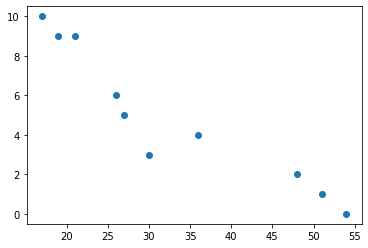

In [6]:
# Your code here.
x = student_data[['Age']] # x - What we use to predict the value
y = student_data['Tardies'] # y - this is the target value. The thing we want to predict. We want to predict 'Tardies' by Age
plt.scatter(x,y)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
'''
Yes, I see that younger people get later to the class than older ones
'''

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000


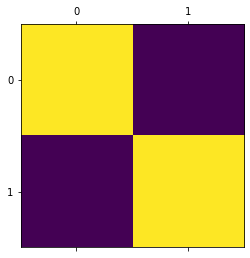

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [12]:
# Your response here.
#correlation:
print(student_data.corr())
plt.matshow(student_data.corr())
plt.show()

#covariance:
student_data.cov()

'''
Correlation gives direction and strength of the relationship between 2 variables.
We can see that they are negatively strong correlated.

Covariance just gives direction. It shows us that the variables change at the opposite direction.
'''

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [13]:
# Your response here.
x = student_data[['Age']] 
y = student_data['Tardies'] 

from sklearn import linear_model

model = linear_model.LinearRegression()

result = model.fit(x,y) 
result.intercept_

12.888803363135771

In [14]:
result.coef_

array([-0.24282077])

Plot your regression model on your scatter plot.

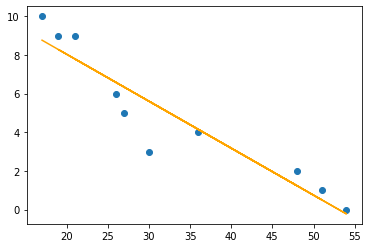

In [17]:
# Your code here.
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x,regression_line,c='orange')
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [20]:
# Your response here. 
result.score(x,y)

'''
88% of the errors are captured by the linear regression model defined, so Im pretty confident od the model.
As we saw at the correlation, these two variables are strong correlated to each other, so age is a good predictor of tardiness.
'''

0.8820265558250109

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [21]:
# Import any libraries you may need & the data
data = pd.read_csv("vehicles.csv")
data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [23]:
# Your response here. 
data_cor = data[['Year','Cylinders','Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']]
data_cor

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


In [24]:
data_cor.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


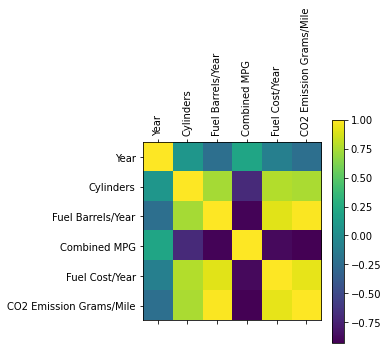

In [41]:

plt.matshow(data_cor.corr())
plt.colorbar()
plt.xticks(range(0,6),data_cor.columns,rotation=90)
plt.yticks(range(0,6),data_cor.columns)
plt.show()


In [ ]:
''' 
The strongest correlated variable for CO2 Emission Grams/Mile is Fuel Barrels/Year.
We can find another variable with strong possitive correlation: Fuel Cost/Year & with strong negative correlation: Combined MPG.
Suprisely Year is the less correlated variable for CO2 Emission Grams/Mile
'''

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [42]:
# Your response here. 
X = data_cor[['Fuel Barrels/Year','Cylinders']]
y = data_cor['CO2 Emission Grams/Mile']

'''
I use for X the variable with the strongest correlation (Fuel Barrels/Year) and Cylinders, because others variables are
strong correlated to Fuel Barrels/Year
'''

In [43]:
model = linear_model.LinearRegression()
result = model.fit(X,y) 

In [44]:
result.score(X,y)

0.9737445898885942

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

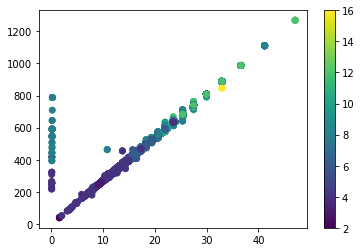

In [51]:
# Your response here. 
#plt.plot(X,regression_line,c='orange')
plt.scatter(data_cor['Fuel Barrels/Year'],y,c = data_cor['Cylinders'])
plt.colorbar()

plt.show()

In [52]:
result.intercept_

10.245276662836204

In [53]:
result.coef_

array([25.27931432,  3.45636638])

In [54]:
result.score(X,y)

0.9737445898885942

In [ ]:
'''
I feel pretty solid with the multilinear regression model I set with a Coefficient of Determination of 0,973
This means more than 97% of the errors are captured by the linear estimate.
'''

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [55]:
# Your code here.
party_attendance = pd.DataFrame({'People Invited': [1,3,4,6,8,9,11,14], 'Attended': [1,2,4,4,5,7,8,13]})
party_attendance

,People Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

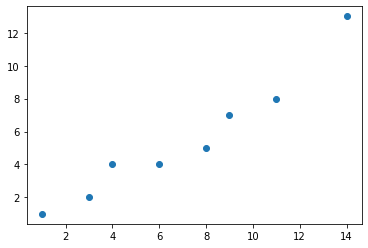

In [56]:
# Your code here.
x = party_attendance[['People Invited']]
y = party_attendance[['Attended']]
plt.scatter(x,y)

In [60]:
model = linear_model.LinearRegression()
result = model.fit(x,y) 
regression_line = result.intercept_ + result.coef_[0]*x

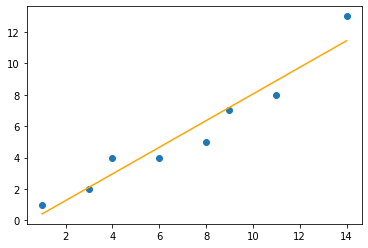

In [61]:
plt.plot(x,regression_line,c='orange')
plt.scatter(x,y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [63]:
# Your response here. 
'''
it says that the more people I invited, the more people attended'''

'\nit says that the more people I invited, the more people attended'

In [64]:
result.score(x,y)

0.9316696375519905

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [68]:
# Your response here. 
new_party_attendance=party_attendance.drop([7])
new_party_attendance

,People Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


In [69]:
x = new_party_attendance[['People Invited']]
y = new_party_attendance[['Attended']]
model = linear_model.LinearRegression()
result = model.fit(x,y) 
regression_line = result.intercept_ + result.coef_[0]*x

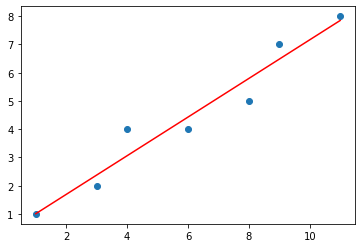

In [70]:
plt.plot(x,regression_line,c='red')
plt.scatter(x,y)
plt.show()

In [71]:
result.score(x,y)

0.9433811802232855

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [72]:
# Your response here. 
''' 
I got a slightly better result, didnt thing the row 7 could be an outlier, although looks like the variable with the biggest error from the regression
'''

' \nI got a slightly better result, didnt thing the row 7 could be an outlier, although looks like the variable with the biggest error from the regression\n'